In [1]:
from keras.datasets import imdb

# Train with most frequently occred 500 words.
max_features = 10000
maxlen = 500

(train_data, train_labels), (val_data, val_labels) = imdb.load_data(num_words=max_features)

Using TensorFlow backend.


In [2]:
from keras.preprocessing import sequence

train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
val_data = sequence.pad_sequences(val_data, maxlen=maxlen)

In [3]:
from keras import models
from keras import layers

def bidirectional_lstm(max_features, output_dim):
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=max_features, output_dim=output_dim))
    model.add(layers.Bidirectional(layer=layers.LSTM(units=output_dim,
                                                     dropout=0.1,
                                                     recurrent_dropout=0.3)))
    model.add(layers.Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    return model
    
def bidirectional_gru(max_features, output_dim):
    model = models.Sequential()
    model.add(layers.Embedding(input_dim=max_features, output_dim=output_dim))
    model.add(layers.Bidirectional(layer=layers.GRU(units=output_dim,
                                                    dropout=0.1,
                                                    recurrent_dropout=0.3)))
    model.add(layers.Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

    return model

In [4]:
# Case I, Bidirectional LSTM layer

model_bl = bidirectional_lstm(max_features, 32)
model_bl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                16640     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [5]:
history_bl = model_bl.fit(train_data, train_labels,
                          epochs=15,
                          batch_size=128,
                          validation_data=(val_data, val_labels))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 249s 10ms/step - loss: 0.5574 - acc: 0.7372 - val_loss: 0.3906 - val_acc: 0.8366
Epoch 2/15
25000/25000 [==============================] - 247s 10ms/step - loss: 0.3854 - acc: 0.8380 - val_loss: 0.3819 - val_acc: 0.8327
Epoch 3/15
25000/25000 [==============================] - 246s 10ms/step - loss: 0.3398 - acc: 0.8639 - val_loss: 0.3764 - val_acc: 0.8350
Epoch 4/15
25000/25000 [==============================] - 247s 10ms/step - loss: 0.3163 - acc: 0.8746 - val_loss: 0.4231 - val_acc: 0.8219
Epoch 5/15
25000/25000 [==============================] - 247s 10ms/step - loss: 0.2924 - acc: 0.8848 - val_loss: 0.4510 - val_acc: 0.8212
Epoch 6/15
25000/25000 [==============================] - 247s 10ms/step - loss: 0.2789 - acc: 0.8927 - val_loss: 0.3754 - val_acc: 0.8416
Epoch 7/15
25000/25000 [==============================] - 242s 10ms/step - loss: 0.2625 - acc: 0.8997 - val_loss: 0.

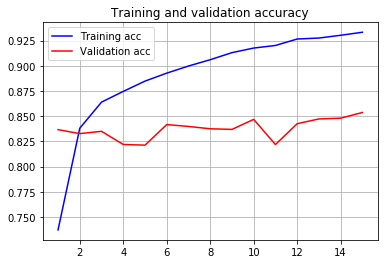

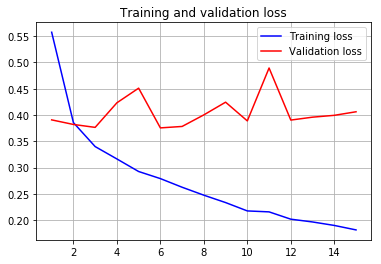

In [11]:
import numpy as np
import matplotlib.pyplot as plt

acc = history_bl.history['acc']
val_acc = history_bl.history['val_acc']
loss = history_bl.history['loss']
val_loss = history_bl.history['val_loss']

epochs = np.arange(len(loss)) + 1

plt.figure('Training and validation accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='b', label='Training acc')
plt.plot(epochs, val_acc, color='r', label='Validation acc')
plt.legend()
plt.grid()
plt.show()

plt.figure('Training and validation loss')
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='b', label='Training loss')
plt.plot(epochs, val_loss, color='r', label='Validation loss')
plt.legend()
plt.grid()
plt.show()

In [6]:
# Case II, Bidirectional GRU layer

model_gru = bidirectional_gruru(max_features, 32)
model_gru.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                12480     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 332,545
Trainable params: 332,545
Non-trainable params: 0
_________________________________________________________________


In [7]:
history_gru = model_gru.fit(train_data, train_labels,
                            epochs=15,
                            batch_size=128,
                            validation_data=(val_data, val_labelsls))

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 198s 8ms/step - loss: 0.5808 - acc: 0.6998 - val_loss: 0.4759 - val_acc: 0.7769
Epoch 2/15
25000/25000 [==============================] - 196s 8ms/step - loss: 0.4318 - acc: 0.8094 - val_loss: 0.4185 - val_acc: 0.8080
Epoch 3/15
25000/25000 [==============================] - 196s 8ms/step - loss: 0.3855 - acc: 0.8357 - val_loss: 0.4074 - val_acc: 0.8124
Epoch 4/15
25000/25000 [==============================] - 196s 8ms/step - loss: 0.3562 - acc: 0.8540 - val_loss: 0.3841 - val_acc: 0.8318
Epoch 5/15
25000/25000 [==============================] - 196s 8ms/step - loss: 0.3356 - acc: 0.8662 - val_loss: 0.3878 - val_acc: 0.8328
Epoch 6/15
25000/25000 [==============================] - 193s 8ms/step - loss: 0.3190 - acc: 0.8722 - val_loss: 0.3710 - val_acc: 0.8456
Epoch 7/15
25000/25000 [==============================] - 191s 8ms/step - loss: 0.3048 - acc: 0.8791 - val_loss: 0.3966 - 

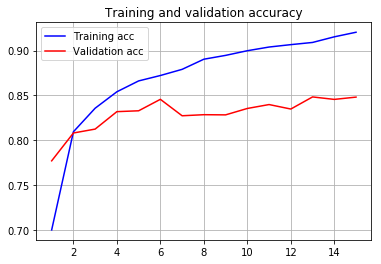

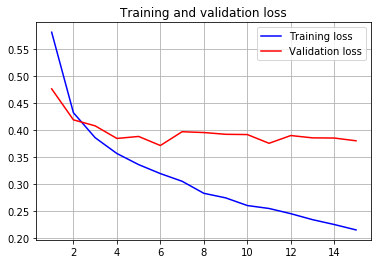

In [12]:
acc = history_gru.history['acc']
val_acc = history_gru.history['val_acc']
loss = history_gru.history['loss']
val_loss = history_gru.history['val_loss']

epochs = np.arange(len(loss)) + 1

plt.figure('Training and validation accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='b', label='Training acc')
plt.plot(epochs, val_acc, color='r', label='Validation acc')
plt.legend()
plt.grid()
plt.show()

plt.figure('Training and validation loss')
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='b', label='Training loss')
plt.plot(epochs, val_loss, color='r', label='Validation loss')
plt.legend()
plt.grid()
plt.show()